In [48]:
import os
from array import array
import numpy as np
from commpy.filters import rcosfilter
from commpy.filters import rrcosfilter
import matplotlib
import matplotlib.pyplot as plt
import ipympl
#%matplotlib inline
%matplotlib widget

In [49]:
def gen_rrc_filter_impulse_response(n, f_sampl, t_symb, roll_off=0.24):
    s_psf = rrcosfilter(n * f_sampl, roll_off, Ts=t_symb, Fs=f_sampl)[1][1:]
    #plt.figure()
    #plt.plot(s_psf, '*-')
    #plt.grid()
    #plt.title('RC filter impulse response')
    #plt.show()
    return s_psf

In [50]:
def calculate_spectrum(signal):
    yf = np.fft.fft(signal)
    yf = np.abs(yf.reshape((len(yf), 1))) / len(signal)
    return yf


def plot_spectrum(signal, figure_counter, title="Amplitude spectrum"):
    spectrum = np.roll(calculate_spectrum(signal), len(signal) // 2)
    yf = 20 * np.log10(spectrum)

    plt.figure(figure_counter)
    plt.cla()
    x_data = np.arange(-len(spectrum) // 2 + 1, len(spectrum) // 2 + 1)
    x_data = x_data / (len(spectrum) / 2)
    plt.plot(x_data, yf)
    plt.grid(1)
    plt.xlabel('Frequency (semicircles)')
    plt.ylabel('Magnitude (dB)')
    plt.title(title)
    plt.show()
    return yf

def add_freq(sig, f0_to_fsig):
    n = np.arange(0, len(sig), 1)
    j_exp = np.exp(1j * np.pi * f0_to_fsig * n)
    print("complex exp")
    print(j_exp[0 : 20])
    mixer = np.exp(1j * np.pi * f0_to_fsig * n)
    return sig * mixer

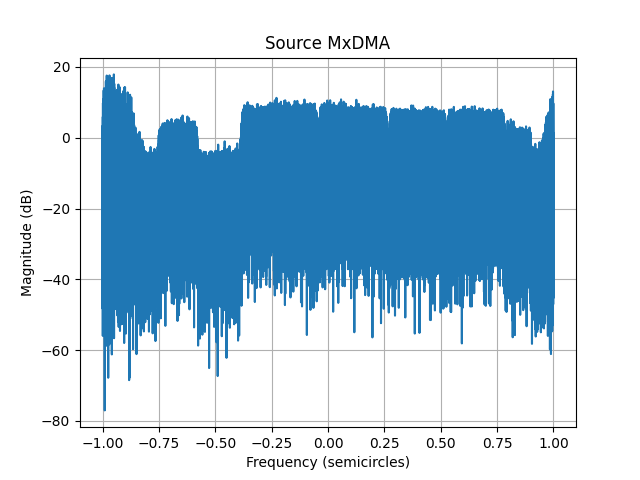

array([[-15.60242146],
       [-21.74131916],
       [-12.72240454],
       ...,
       [-15.01385749],
       [-16.88711576],
       [-11.40121481]])

In [51]:


def read_signal(file_name, data_type):
    file_stats = os.stat(file_name)
    file_size = file_stats.st_size
    iq_size_in_bytes = 4
    number_of_int_to_read = file_size // iq_size_in_bytes * 2
    arr = array(data_type)
    with open(file_path, 'rb') as fileobj:
        arr.fromfile(fileobj, number_of_int_to_read)
    i = np.array(arr[:: 2])
    i = i.reshape((len(i), 1))
    q = np.array(arr[1:: 2])
    q = q.reshape((len(q), 1))
    sig = np.empty((len(i), 1), complex)
    sig.real = i
    sig.imag = q
    sig_flatten = sig.flatten()
    return sig_flatten

file_path = "/home/xy/Signals/MxDMA/HRC/sig_1264460229_16437329_2024-06-14_14-48-43.pcm"
data_type = 'h'
figure_counter = 0
source_signal_full = read_signal(file_path, data_type)
start_pos = 75177 # [IQ-samples]
used_len = 1643000 #16437329 # [IQ-samples]
source_signal = source_signal_full[int(start_pos):int(start_pos + used_len)]
plot_spectrum(source_signal, 1, "Source MxDMA")

complex exp
[ 1.        +0.j          0.77885654+0.62720212j  0.21323501+0.97700094j
 -0.44669757+0.89468502j -0.90906166+0.41666162j -0.96935966-0.24564577j
 -0.60092256-0.79930725j  0.03329473-0.99944558j  0.6527862 -0.7575422j
  0.98355887-0.18058781j  0.87931631+0.4762382j   0.38616365+0.92243029j
 -0.27778415+0.96064352j -0.81887164+0.57397668j -0.99778292-0.06655254j
 -0.73538786-0.67764644j -0.14774036-0.98902618j  0.50525076-0.86297258j
  0.93477608-0.35523749j  0.95086217+0.3096145j ]


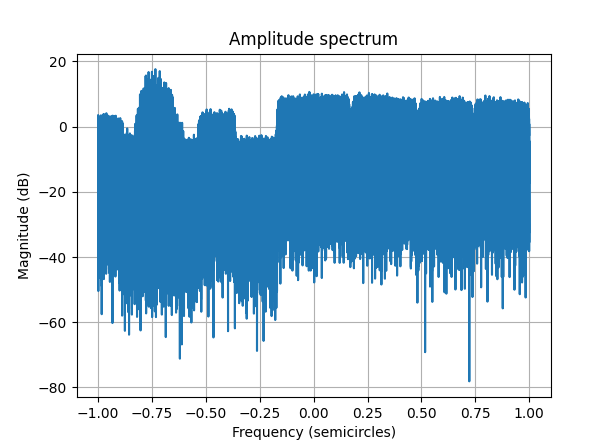

array([[-2.71368644],
       [-4.68553009],
       [-7.67900974],
       ...,
       [-7.5342655 ],
       [-7.44039986],
       [-2.47931322]])

In [52]:
# first subband
left_board = -0.3804
right_board = -0.0512

subcarr_freq = (left_board + right_board) / 2
mixed_sig = add_freq(source_signal, -subcarr_freq)
plot_spectrum(mixed_sig, 2)

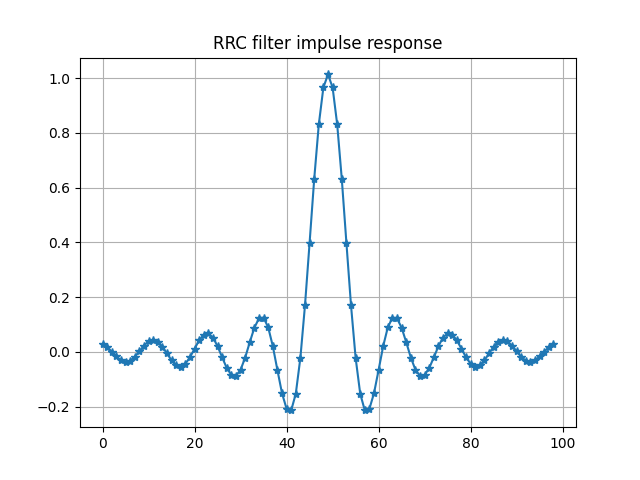

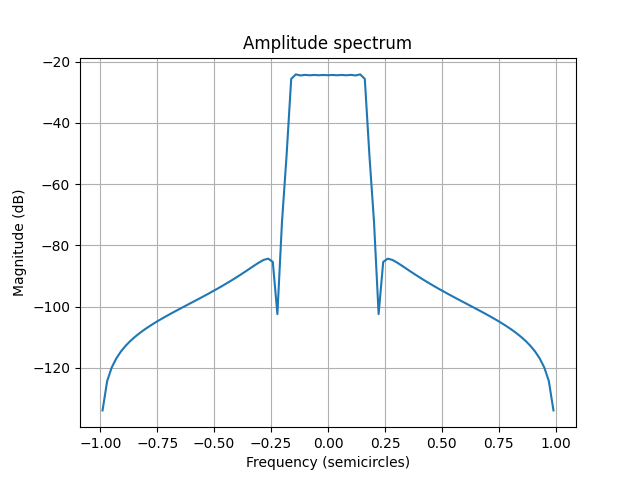

array([[-133.83705564],
       [-124.27975141],
       [-119.81298233],
       [-116.84564063],
       [-114.6028747 ],
       [-112.78475283],
       [-111.24319424],
       [-109.89403852],
       [-108.68476761],
       [-107.58032396],
       [-106.55606803],
       [-105.59395308],
       [-104.68029921],
       [-103.80442486],
       [-102.95776645],
       [-102.13329008],
       [-101.32508518],
       [-100.52807544],
       [ -99.73780773],
       [ -98.95029426],
       [ -98.16189201],
       [ -97.36920947],
       [ -96.56903408],
       [ -95.75827718],
       [ -94.93393608],
       [ -94.09307613],
       [ -93.23284119],
       [ -92.35050968],
       [ -91.44363042],
       [ -90.51030591],
       [ -89.54976191],
       [ -88.5635006 ],
       [ -87.55771799],
       [ -86.54867879],
       [ -85.57575909],
       [ -84.73747435],
       [ -84.31357946],
       [ -85.37016972],
       [-102.40813258],
       [ -72.33444322],
       [ -50.60069712],
       [ -25.670

In [59]:
# RRC filtering
sig_board = 0.168
N = 100
Fs = 1
T_symb = 1 / sig_board
s_rrc = gen_rrc_filter_impulse_response(N, Fs, T_symb, 0.05)
plt.figure(3)
plt.cla()
plt.plot(s_rrc, '*-')
plt.grid()
plt.title('RRC filter impulse response')
plt.show()

plot_spectrum(s_rrc, 4)

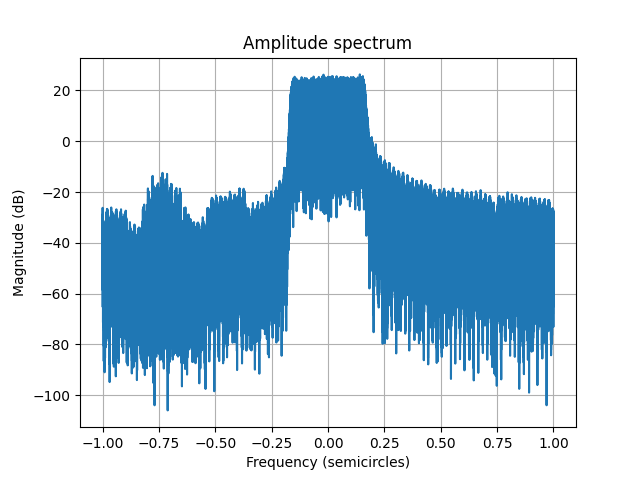

array([[-32.33097599],
       [-34.97150163],
       [-38.03292994],
       ...,
       [-37.92769634],
       [-36.82775249],
       [-32.20186618]])

In [60]:
sig_rrc_filtered = np.convolve(mixed_sig, s_rrc, 'same')
plot_spectrum(sig_rrc_filtered, 5)

In [67]:
a = np.array([1, 3, 4, 5, 6, 9])
b = np.array([2, 4, 6, 8])
res = np.convolve(a, b)
print(res)

[  2  10  26  52  80 104 112 102  72]


In [68]:
res = np.convolve(a, b, 'same')
print(res)

[ 10  26  52  80 104 112]
